In [50]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df=pd.read_csv("salaries_cyber.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [52]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [53]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              87
salary                384
salary_currency        21
salary_in_usd         579
employee_residence     58
remote_ratio            3
company_location       55
company_size            3
dtype: int64

In [54]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [55]:
#find the job title whose employee were max and min every year
grouped_data=df.groupby("work_year")
print("max jon in every year",grouped_data["job_title"].max())
print("min job in every year",grouped_data["job_title"].min())

max jon in every year work_year
2020             Vulnerability Researcher
2021    Vulnerability Management Engineer
2022             Vulnerability Researcher
Name: job_title, dtype: object
min job in every year work_year
2020    Application Security Engineer
2021    Application Security Engineer
2022     Application Security Analyst
Name: job_title, dtype: object


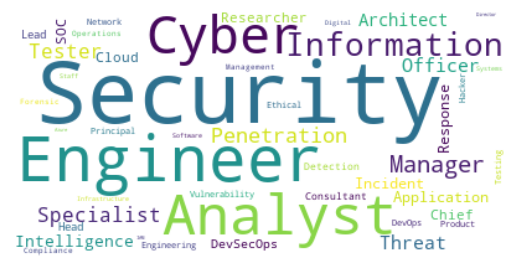

In [56]:
#creating word cloud for most used words
text_variable = " ".join(title for title in df.job_title)
word_cloud1 = WordCloud(collocations = False, background_color='white')
word_cloud1.generate(text_variable)
word_cloud1.to_file ('word_cloud.png')
#Displaying Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [58]:
grouped_salary=df.groupby("job_title")["salary"].mean()
top_salary=grouped_salary.sort_values(ascending=False).head(10)
print(top_salary)

job_title
Incident Response Lead                  7.156686e+07
Principal Security Engineer             8.147667e+05
IT Security Engineer                    7.835200e+05
Security Operations Engineer            7.375000e+05
Information Security Compliance Lead    4.500000e+05
Application Security Engineer           3.995510e+05
Network Security Engineer               3.343333e+05
Cyber Security Researcher               3.188889e+05
Application Security Architect          3.150000e+05
Staff Security Engineer                 2.950000e+05
Name: salary, dtype: float64


In [59]:
salary_mean=statistics.mean(df["salary"])
salary_median=statistics.median(df["salary"])
print("mean salary is: ",salary_mean)
print("median salary is: ",salary_median)

mean salary is:  560852.4883720931
median salary is:  120000


In [60]:
pip install country_converter

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [61]:
#median salary analysis wordwide
import country_converter as cc
import plotly.express as px

df["company_location"] = cc.convert(names=df["company_location"], to="ISO3")

grouped = df[['company_location', 'salary_in_usd']].groupby('company_location').median().reset_index()

fig = px.choropleth(locations=grouped['company_location'],
                    color=grouped['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.Peach)
fig.show()

In [62]:
#Experience vs Salary Bar Plot
df.groupby("experience_level")["salary_in_usd"].sum().sort_values(ascending=False)

experience_level
SE    79074451
MI    42591357
EX    14651544
EN    13669587
Name: salary_in_usd, dtype: int64

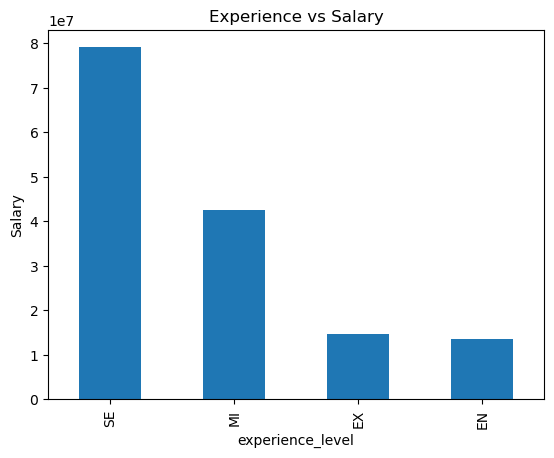

In [63]:
plt.title("Experience vs Salary")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
df.groupby("experience_level")["salary_in_usd"].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

In [64]:
#Employment Type V/s Salary Bar & Line Plot
df.groupby("employment_type")["salary"].sum().sort_values(ascending=False)


employment_type
FT    697096053
CT      1337000
PT       710000
FL       240000
Name: salary, dtype: int64

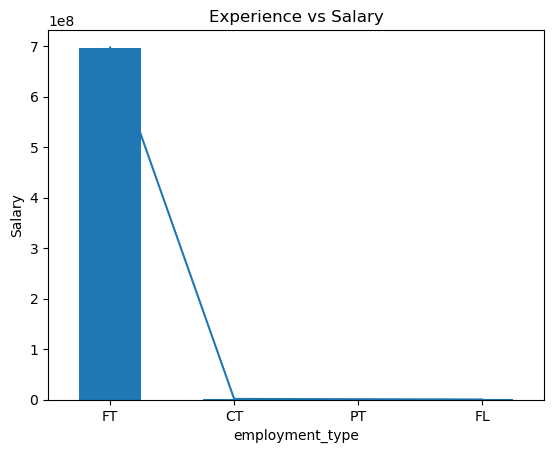

In [65]:
plt.title("Experience vs Salary")
plt.xlabel("Employment Type")
plt.ylabel("Salary")
df.groupby("employment_type")["salary"].sum().sort_values(ascending=False).plot(kind="bar")
df.groupby("employment_type")["salary"].sum().sort_values(ascending=False).plot(kind="line")
plt.show()

In [66]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

company_size
L    618262972
M     67520330
S     13599751
Name: salary, dtype: int64


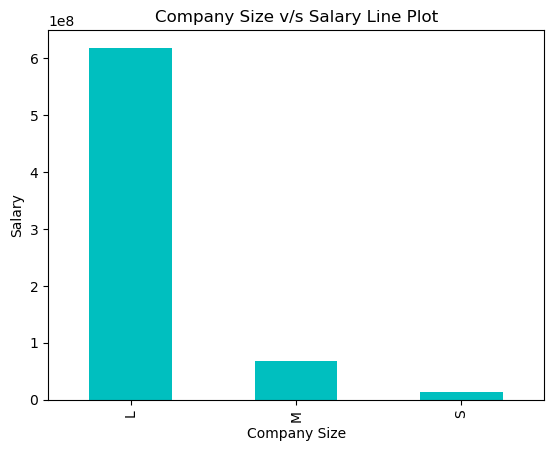

In [67]:
groupeddata=df.groupby("company_size")["salary"].sum().sort_values(ascending=False)
print(groupeddata)
df.groupby("company_size")["salary"].sum().sort_values(ascending=False).plot(color="c", kind="bar")
plt.title("Company Size v/s Salary Line Plot")
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.show()

# 18 Employees with Different Salary Currency

In [68]:
df['salary_currency'].value_counts()


salary_currency
USD    934
EUR    127
GBP     56
CAD     39
INR     23
AUD     18
BRL     12
CHF      9
NZD      5
PLN      4
DKK      4
ZAR      3
SEK      3
ILS      2
SGD      2
NOK      1
IDR      1
MXN      1
HUF      1
TWD      1
RUB      1
Name: count, dtype: int64

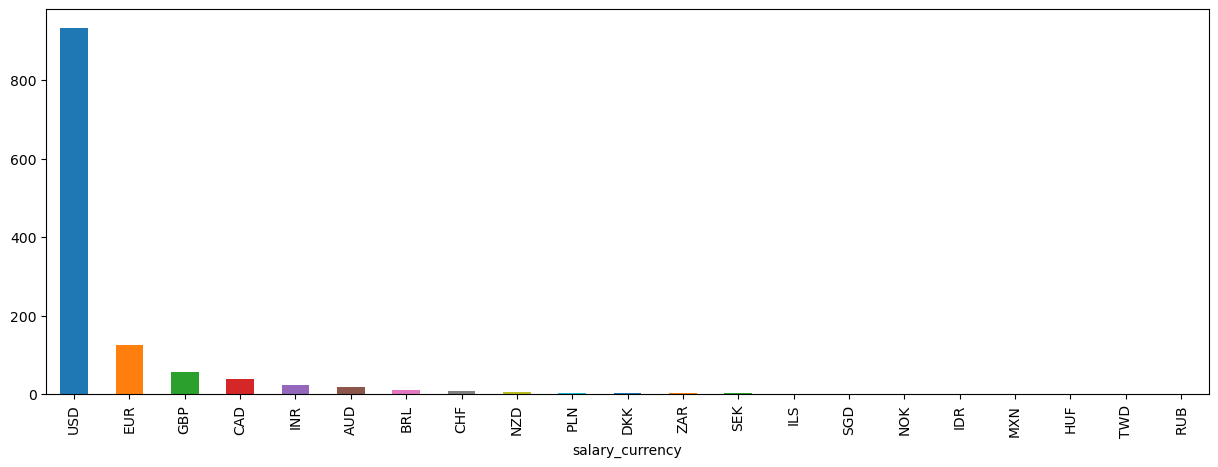

In [69]:
plt.figure(figsize=(15, 5))
df['salary_currency'].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
plt.show()


# Employee Count on different Company Location

In [70]:
df['company_location'].value_counts()

company_location
USA    882
GBR     57
CAN     51
DEU     33
IND     23
AUS     21
FRA     19
CHE     14
NLD     13
BRA     12
ESP     11
ITA      8
PRT      8
DNK      6
POL      5
GRC      5
NZL      5
IRL      5
ROU      4
RUS      4
SVN      4
SWE      4
SGP      4
BEL      3
ARG      3
ZAF      3
NOR      3
ISR      3
AUT      2
EST      2
AFG      2
HUN      2
JPN      2
ARE      2
DZA      2
PAK      1
BWA      1
SAU      1
VNM      1
TWN      1
EGY      1
LUX      1
UMI      1
CHL      1
AZE      1
MEX      1
SRB      1
KEN      1
ATA      1
IDN      1
CZE      1
ALA      1
HRV      1
ETH      1
TUR      1
Name: count, dtype: int64

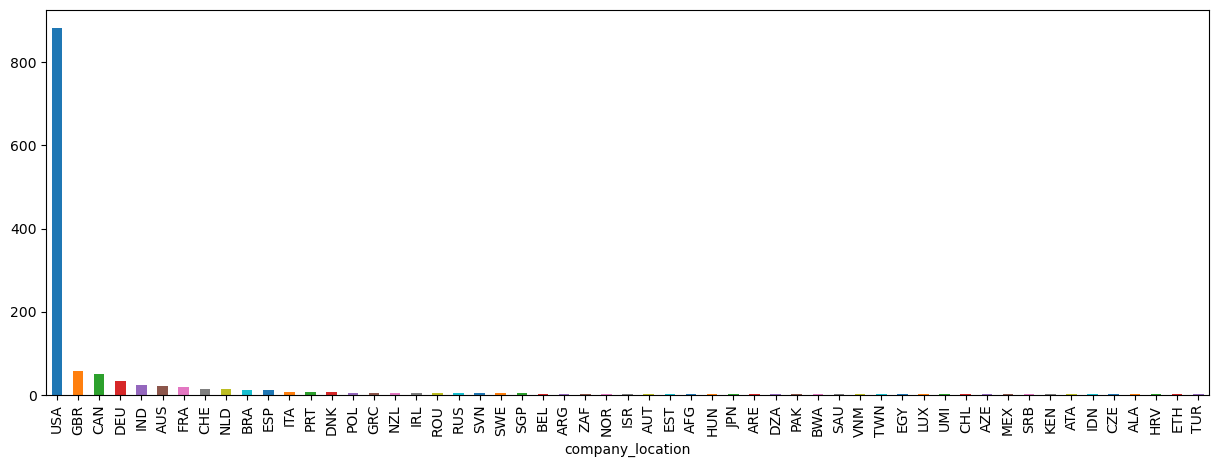

In [71]:
plt.figure(figsize=(15, 5))
df['company_location'].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
plt.show()

# 20 No of Employess for each Job Title

In [72]:
df['job_title'].value_counts()

job_title
Security Engineer                          194
Cyber Security Analyst                     133
Penetration Tester                          70
Information Security Manager                64
Cyber Security Engineer                     63
                                          ... 
Principal Application Security Engineer      1
Application Security Specialist              1
Information Security Compliance Analyst      1
Application Security Architect               1
Concierge Security Engineer                  1
Name: count, Length: 87, dtype: int64

<Axes: xlabel='job_title'>

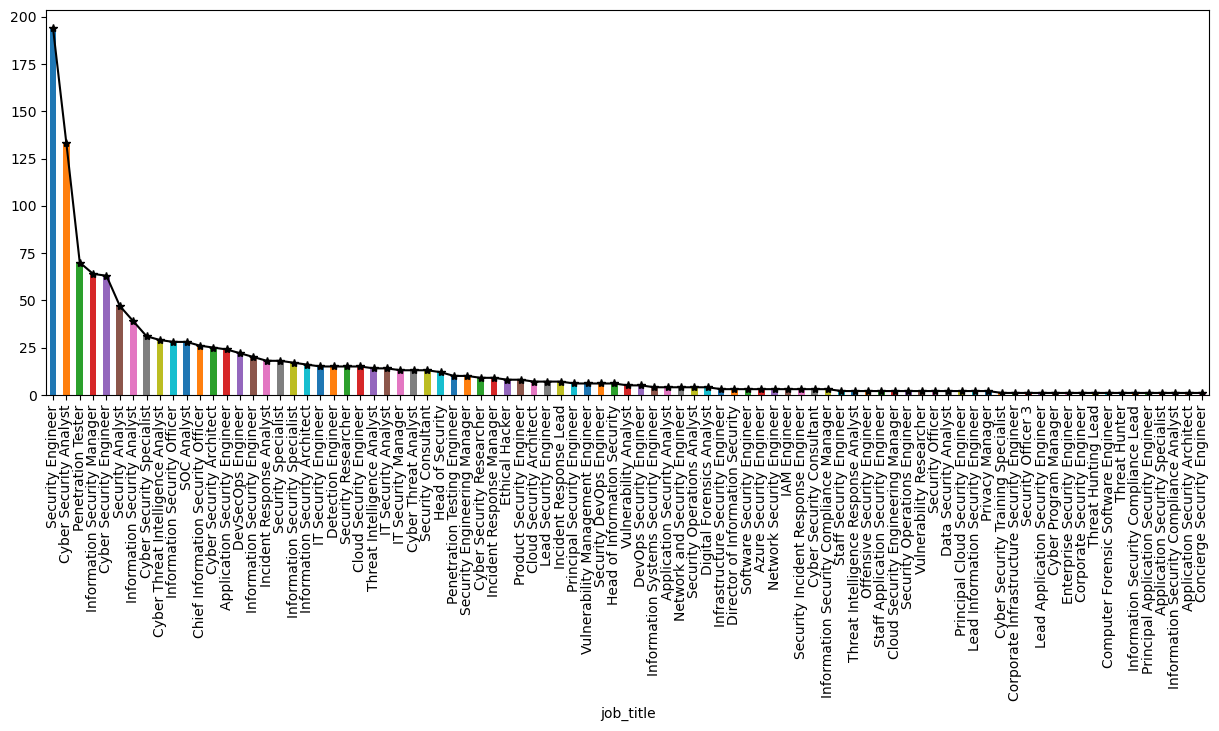

In [73]:
plt.figure(figsize=(15,5))
df['job_title'].value_counts().plot(kind='line',color='black',marker="*")
df['job_title'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

# 21 Salary v/s Experience Level for each Year

The salary of employee as per their experience level:

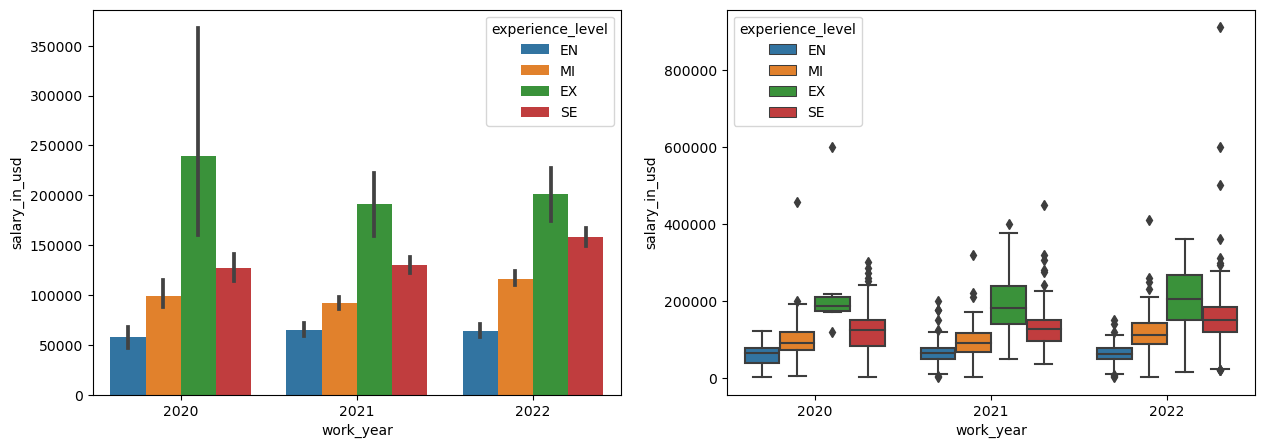

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['experience_level'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['experience_level'])
plt.show()
plt.show()

# 22 Salary v/s Employee Type for each Year

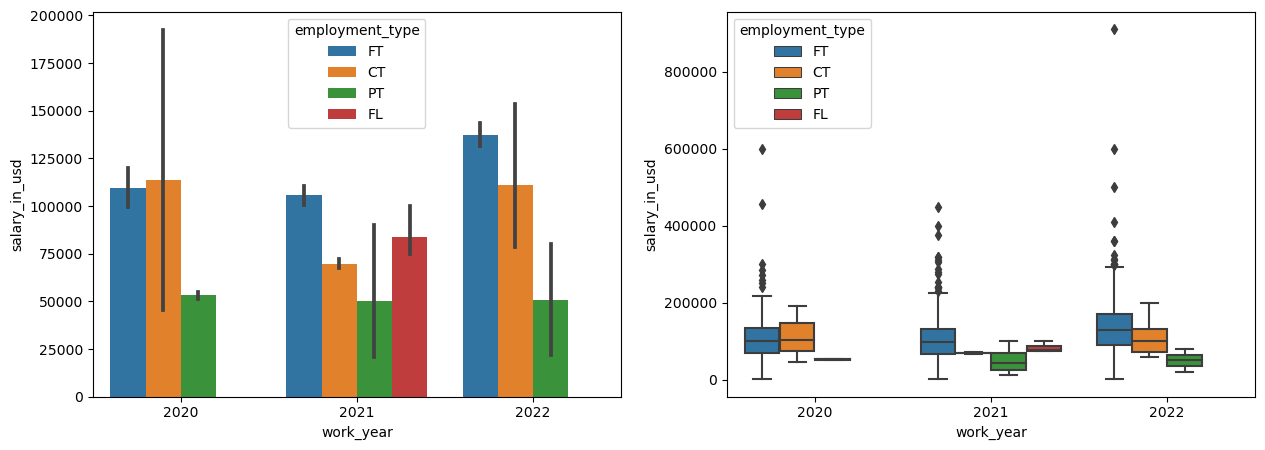

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['employment_type'])
plt.show()

# 23 Salary v/s Remote Ratio for each Year

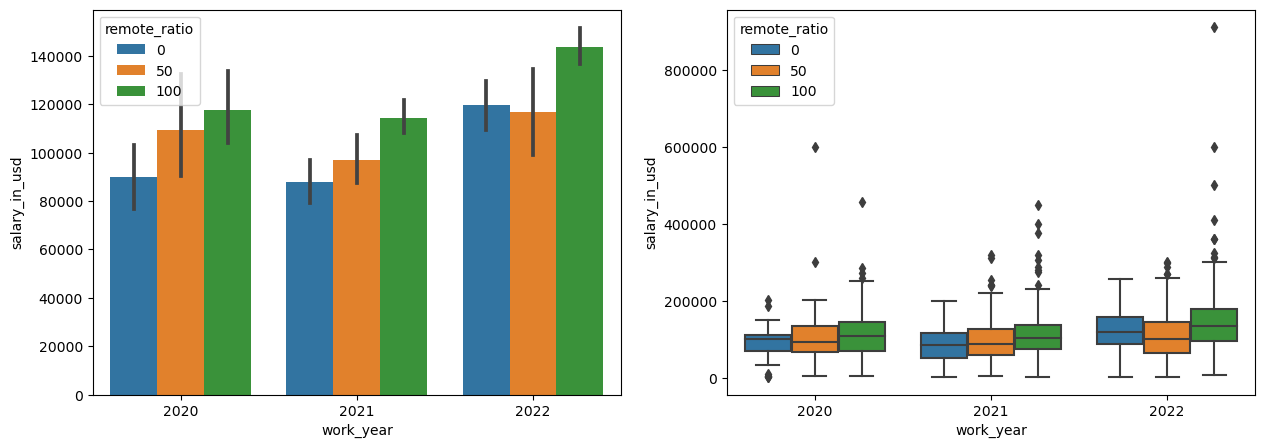

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['remote_ratio'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['remote_ratio'])
plt.show()

# 24 Salary v/s Company Size for each Year

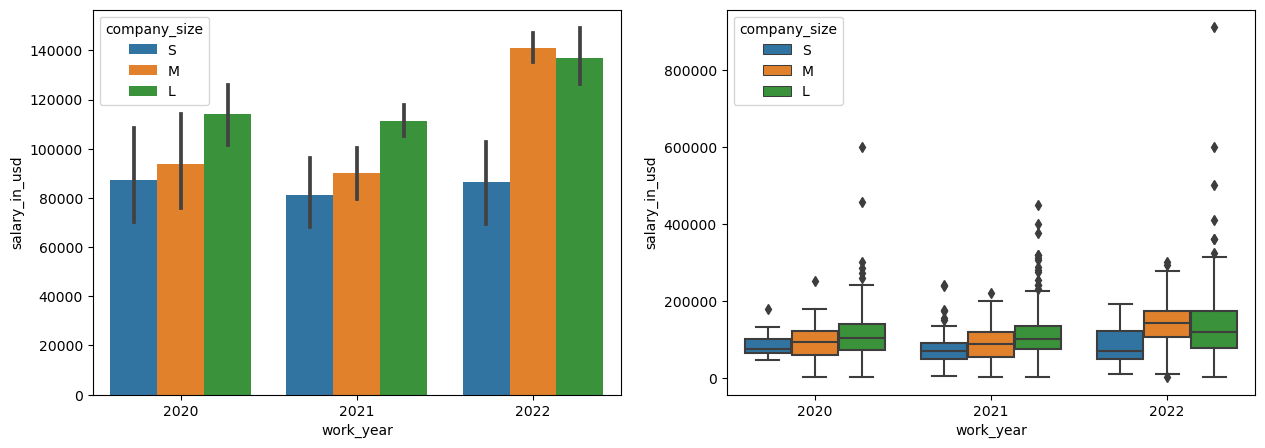

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['company_size'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['company_size'])
plt.show()

# 25 Salary (USD) Growth Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



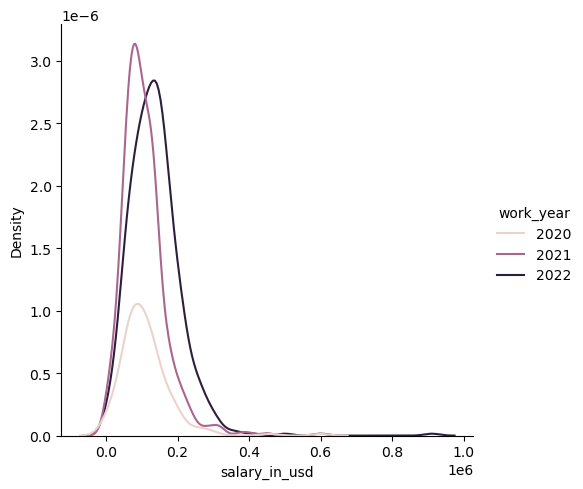

In [78]:
sns.displot(data=df,x='salary_in_usd', hue='work_year', kind='kde')

# 28 Analysis of Entire Dataset through Pair Plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



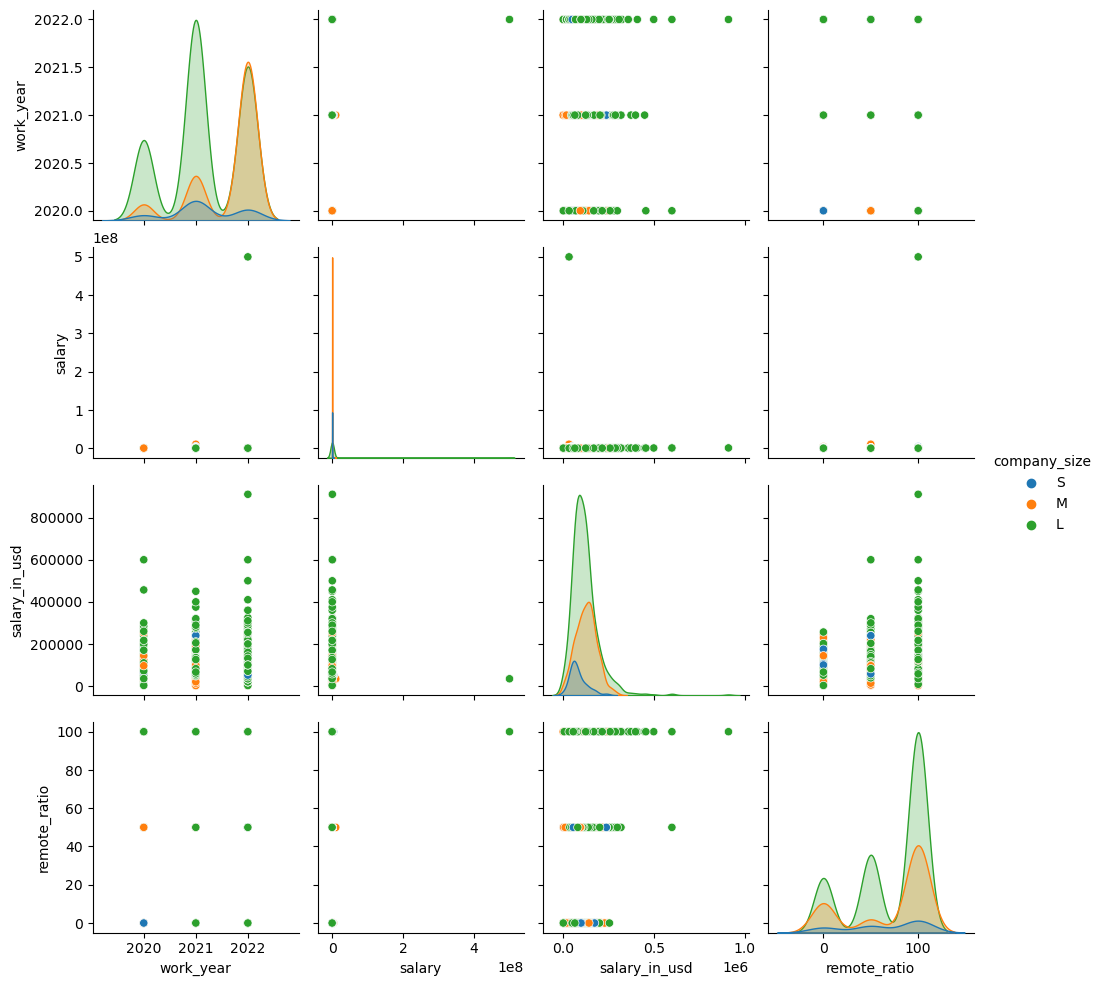

In [79]:
sns.pairplot(df,hue='company_size')